In [1]:
import random
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# init constant from Hodgkin-Huxley model

g_L = 0.003
g_K = 0.36
g_Na = 1.2
E_L = -54.387
E_K = -77
E_Na = 50
C_m = 0.01

init_val = [-60, 0.32, 0.053, 0.6]

In [3]:
alpha_m = lambda V: 0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))
beta_m = lambda V: 4 * np.exp(-0.0556 * (V + 65))

alpha_h = lambda V: 0.07 * np.exp(-0.05 * (V + 65))
beta_h = lambda V: 1 / (1 + np.exp(-0.1 * (V + 35)))

alpha_n = lambda V: 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))
beta_n = lambda V: 0.125 * np.exp(-0.0125 * (V + 65))


def I_Na(V, m, h):
    return g_Na * m ** 3 * h * (V - E_Na)


def I_K(V, n):
    return g_K  * n ** 4 * (V - E_K)


def I_L(V):
    return g_L * (V - E_L)


def derivatives(values, time, I):
    V, n, m, h = values
    
    dV_dt = (I(time) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dn_dt = alpha_n(V) * (1.0 - n) - beta_n(V) * n
    dm_dt = alpha_m(V) * (1.0 - m) - beta_m(V) * m
    dh_dt = alpha_h(V) * (1.0 - h) - beta_h(V) * h
    
    return dV_dt, dn_dt, dm_dt, dh_dt

In [4]:
def plot_results(V_, n_, m_, h_):
    plt.figure(figsize=(15, 10))

    plt.subplot(6, 1, 1)
    plt.ylabel('V(t)')
    plt.plot(t, V_)

    plt.subplot(6, 1, 2)
    plt.ylabel('m(t), n(t), h(t)')
    plt.plot(t, m_, 'y', label='m')
    plt.plot(t, h_, 'r', label='h')
    plt.plot(t, n_, 'c', label='n')
    plt.legend()

    plt.subplot(6, 1, 3)
    plt.ylabel('$I(t)')
    I_ = list(map(I_t, t))
    plt.plot(t, I_)
    
    plt.subplot(6, 1, 4)
    plt.ylabel('V(n)')
    plt.plot(n_, V_)

    plt.subplot(6, 1, 5)
    plt.ylabel('V(m)')
    plt.plot(m_, V_)
             
    plt.subplot(6, 1, 6)
    plt.ylabel('V(h)')
    plt.plot(h_, V_)


    plt.show()

In [5]:
def I_t(t):
    for i in range(len(current)):
        if t < intervals[i]:
            return current[i]
        else:
            t -= intervals[i]
            if t > gap:
                t -= gap
            else:
                return 0
    return 0

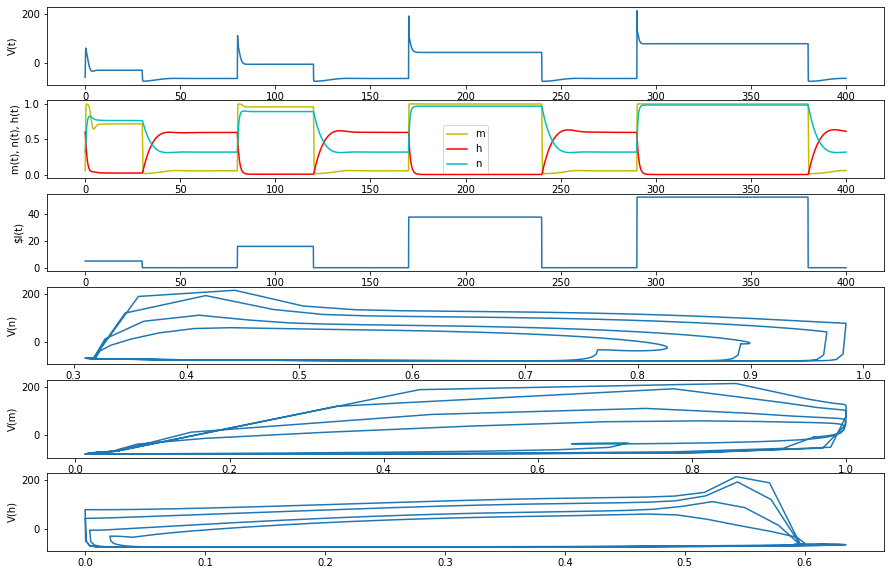

In [6]:
gap = 50
intervals = [30, 40, 70, 90]
current = [5, 16, 38, 53]
    
t = np.arange(0.0, 400.0, 0.05)
y = odeint(derivatives, init_val, t, args=(I_t,))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

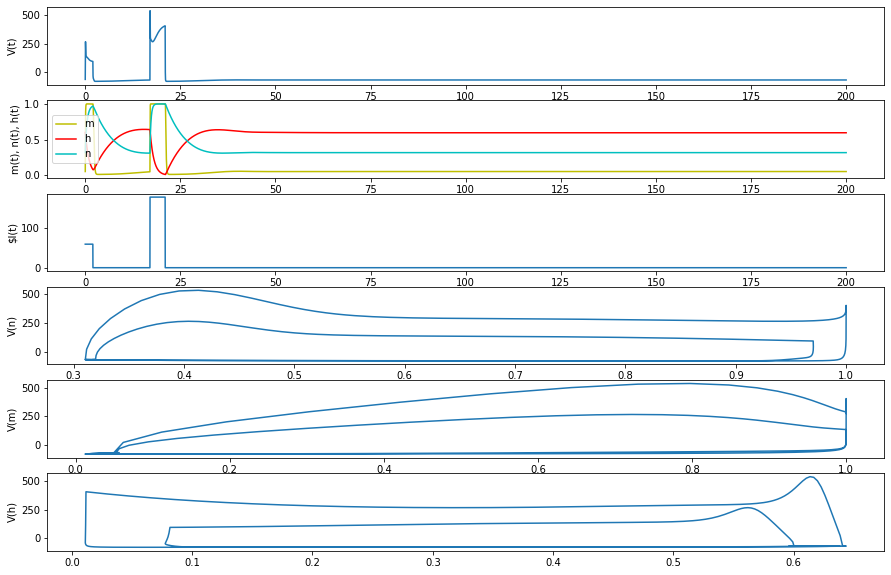

In [10]:
current = [60, 180]
intervals = [2, 4]
gap = 15

t = np.arange(0.0, 200.0, 0.005)
y = odeint(derivatives, init_val, t, args=(I_t,))

V_, n_, m_, h_ = y.T

plot_results(V_, n_, m_, h_)

# Анализ
1. С ростом силы тока увиличивается амплитуда первого спайка.
2. С ростом силы тока пропадает затухание после спайков. 
3. С ростом тока амплетуда большенства спайков (кроме первых) падает.
4. Графики фазового пространства зациклены, что говорит о том, что существуют циклы.